In [1]:
import sys
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Load the data
games = pd.read_csv('games.csv')

In [3]:
# Print the names of the columns in games.
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [4]:
#Print the shape of the DataFrame
print(games.shape)
games.head()

(81312, 20)


,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


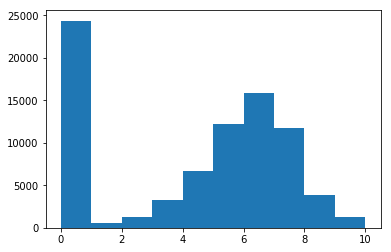

In [5]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(games['average_rating'])
plt.show()

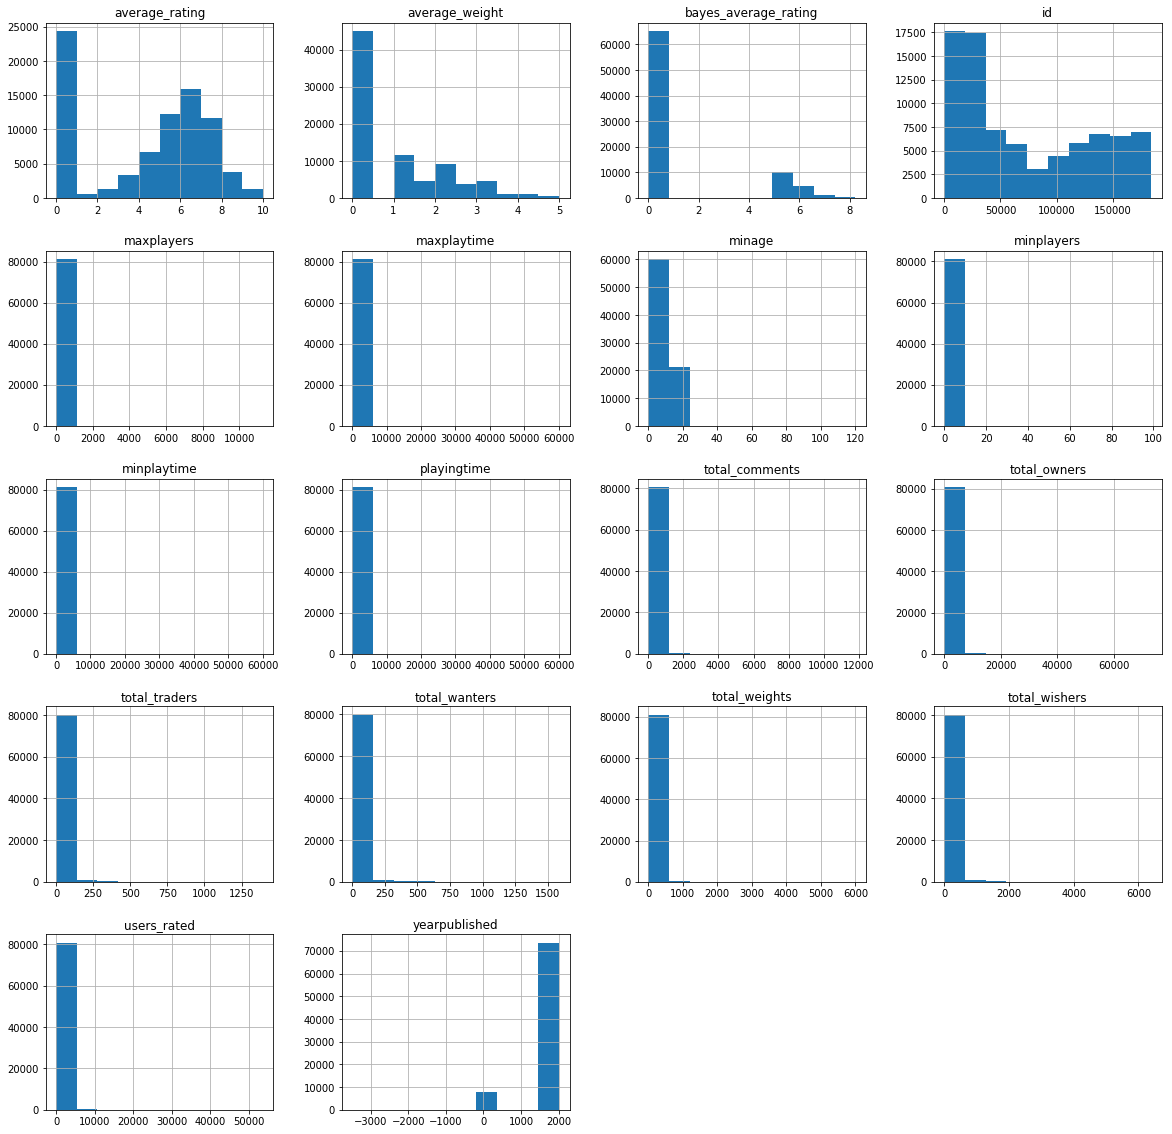

In [6]:
games.hist(figsize = (20,20))

plt.show()

In [7]:
# Print the first row of all the games with zero scores.
# The .iloc method on dataframes allows us to index by position.
print(games[games['average_rating'] == 0].iloc[0])
print('***'*20)
print(games[games['average_rating'] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
************************************************************
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
ma

In [8]:
# Remove any rows without user reviews.
games = games[games['users_rated'] > 0]

# Remove any rows with missing values.
games = games.dropna(axis=0)

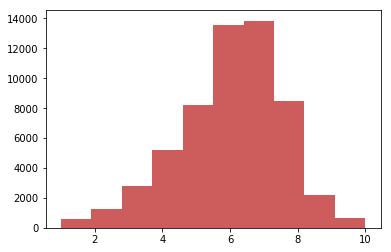

In [9]:
# Make a histogram of all the ratings in the average_rating column.
plt.hist(games['average_rating'],color='indianred')
plt.show()

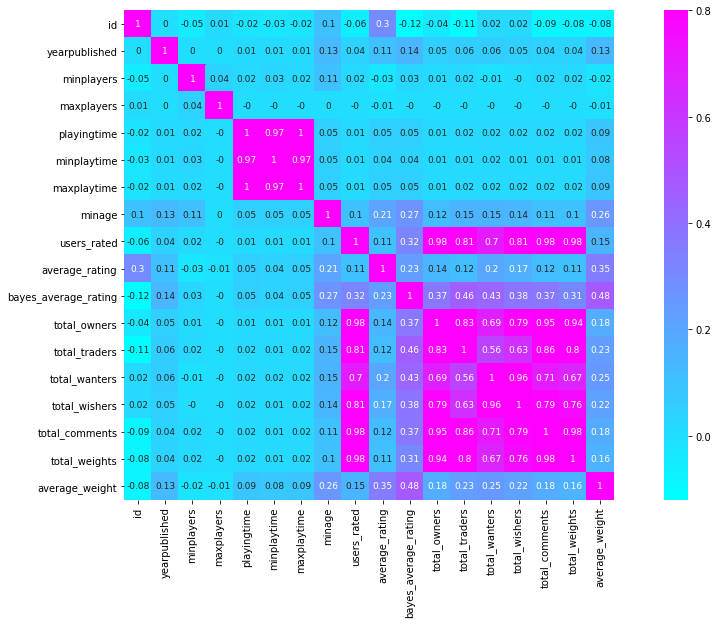

In [10]:
#correlation matrix
corrmat = games.corr().round(2)
fig = plt.figure(figsize = (18,9))
sns.heatmap(corrmat,vmax=.8, square=True, cmap='cool', annot=True, annot_kws={'size': 9})
plt.show()

In [11]:
# Get all the columns from the dataframe.
columns = games.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

# Store the variable we'll be predicting on.
target = "average_rating"

In [12]:
# Generate the training set.  Set random_state to be able to replicate results.
train = games.sample(frac=0.8, random_state=1)

# Select anything not in the training set and put it in the testing set.
test = games.loc[~games.index.isin(train.index)]

# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [13]:
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

In [14]:
# Initialize the model class.
LR = LinearRegression()

#Fit the model to the training data
LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
# Generate our predictions for the test set.
predictions = LR.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

2.078819032629326

In [16]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10, random_state = 1)

#Fit the data
RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [17]:
#make predictions
predictions = RFR.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

1.4458560046071653

In [18]:
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1, -1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1, -1))

#print out the predictions
print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [19]:
test[target].iloc[0]

8.07933